# 実データ（を想定したサンプル）

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd

In [20]:
df = pd.DataFrame([[-2,2] , [26, 22] , [28,26]] , columns=['気温','個数'])
df

,気温,個数
0,-2,2
1,26,22
2,28,26


Text(0, 0.5, '売れた個数')

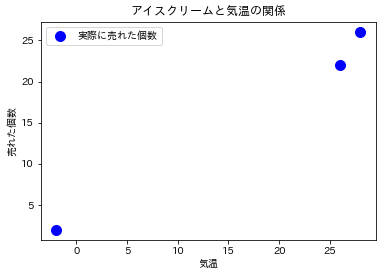

In [21]:
# 入力データ（気温）
x = np.array([-2,26,28])
# 出力データ（それぞれ、気温に対してアイスクリームが売れた個数とする）
y = np.array([2,22,26])

plt.scatter(x,y,s=100,c='blue',label= '実際に売れた個数')

plt.legend(loc='upper left')
plt.title('アイスクリームと気温の関係')    
plt.xlabel('気温')   
plt.ylabel('売れた個数')  

# ①モデルを決定する
モデルは人が決める。
今回は一次間数とする

$$
y = ax + b
$$

$a$と$b$を求める事ができたらゴール

# ②評価関数を決める
平均二乗平方根誤差（RMSE）とする

### モデルに対して、実データを代入する。

$$ 
    \begin{cases}
        x=-2 \quad 正解(y)は2、予測値は、-2a \\
        x=26 \quad 正解(y)は22、予測値は、26a \\
        x=28 \quad 正解(y)は26、予測値は、28a \\
    \end{cases}
$$


### 誤差を求める

$$ 
\begin{aligned}
s &= (2 + 2a)^2 + (22 - 26a)^2 + (26 - 28a)^2  \\
&= (4a^2 + 4a + 4) + (676a^2 - 572a + 484) + (784a^2 - 728a + 676) \\
&= 1464a^2 - 1296a + 1164 \\
\frac{s}{12} &= 122a^2 - 108a + 97
\end{aligned}
$$

$\frac{s}{12}$でも、$s$でも、$a$の最小値は変わらない

<function matplotlib.pyplot.show(close=None, block=None)>

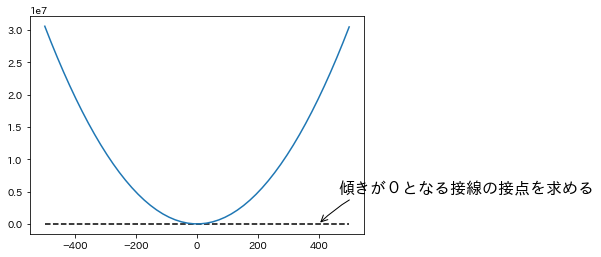

In [24]:
x1 = np.linspace(-500 , 500)
y1 = (122 * x1 ** 2 ) - (108 * x1) + 97
plt.plot(x1 , y1)
plt.hlines([5],x1.min(),x1.max(), "black", linestyles='dashed')

plt.annotate('傾きが０となる接線の接点を求める',
             xy=(x1.max()-100 , 5), xycoords='data',
             xytext=(+20, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.3"))
plt.show

# ③評価関数を最小化する （ここで微分を使う）

$\frac{s}{12}=E$として、評価関数を$a$で微分する

$$ 
\begin{aligned}
E &= 122a^2 - 108a + 97 \\[8px]
\frac{dE}{ds} &= 244a -108 \\[8px]
\end{aligned}
$$

誤差を最小化するには$E$が０となる場合の$a$を求める
$$ 
\begin{aligned}
0 &= 244a -108 \\[4px]
244a &= 108 \\[8px]
a &= \frac{108}{244} \\
&= \frac{27}{61} \\
\end{aligned}
$$



In [29]:
a = 27 / 61

# ④切片を求める

### データの中心化

In [25]:
xc = x - x.mean()
yc = y - y.mean()
print('x中心化：', xc)
print('y中心化：', yc)

x中心化： [-19.33333333   8.66666667  10.66666667]
y中心化： [-14.66666667   5.33333333   9.33333333]


<function matplotlib.pyplot.show(close=None, block=None)>

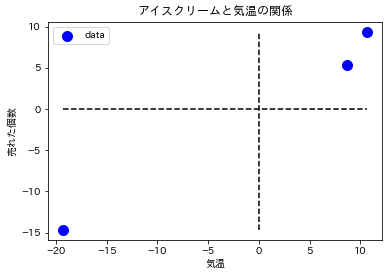

In [27]:
# 中心化後の散布図描画
plt.scatter(xc,yc,s=100,c='blue',label= 'data')
plt.hlines([0] ,xc.min() ,xc.max() , "black", linestyles='dashed')
plt.vlines([0] ,yc.min() ,yc.max() , "black", linestyles='dashed')

plt.legend(loc='upper left')
plt.title('アイスクリームと気温の関係')    
plt.xlabel('気温')   
plt.ylabel('売れた個数')   

plt.show

In [30]:
# 切片を求める
b=y.mean() - (a * x.mean())
print('切片',b)

切片 8.994535519125684


# ⑤予測する

[-2 26 28]
[ 8.10928962 20.50273224 21.38797814]


<function matplotlib.pyplot.show(close=None, block=None)>

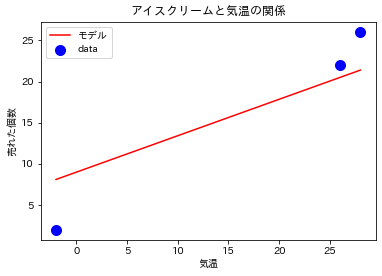

In [32]:
# 求まった傾きから、モデルを定義する
y_hat=a * x + b 

# 散布図
plt.scatter(x,y,s=100,c='blue',label= 'data')
plt.plot(x , y_hat, c='red' ,label='モデル')
# plt.hlines([0],xc.min(),xc.max(), "black", linestyles='dashed')
# plt.vlines([0],yc.min(),y_hat.max(), "black", linestyles='dashed')

plt.legend(loc='upper left')
plt.title('アイスクリームと気温の関係')    
plt.xlabel('気温')   
plt.ylabel('売れた個数')   

plt.show